# Klassifizierung

Neben dem Regressionsproblem, bei dem die abhängige Variable eine quantiative Größe ist, existieren Klassifikationsprobleme, bei denen die abhängige Variable kategorialer Natur ist. Beispielsweise finden sich in den Wirtschaftswissenschaften oft Fragestellungen einer abhängigen Variable mit zwei Kategorien wie der Ausfall eines Schludners, der Verlust eines Kunden, Kaufentscheidungen oder Betrug. Hierbei spricht man auch von binärer Klassifikation. Viele Modelle befassen sich mit der binären Klassifikation, wobei manche davon auch auf den allgemeinen Fall einer abhängigen Variable mit mindestens drei oder mehr möglichen Kagegorien angepasst werden können. Wir werden zunächst die logistiche Regression als natürliche Erweiterung der linearen Regression ansehen und wie mit Hilfe dieses Modells binäre abhängige Variablen analysiert werden können. Hierbei gehen wir wieder ähnlich wie im letzten Kapitel vor: wir betrachten die Modellspefizikation, besprechen wie das Modell anhand von Daten geschätzt wird und fokussieren uns zuletzt auf die Interpretation eines geschätzten Modells. Gegen Ende des Kapitels besprechen wir eine Modellierungsmöglichkeit für abhängige Variablen mit mehr als zwei Kategorien. 

# Logistische Regression

Betrachten wir noch einmal die Gleichung der Regressionsgeraden des linearen Regressionsmodells:

$$
f_{\boldsymbol{ \beta }}(\boldsymbol{x}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p =  \boldsymbol{\beta}^T \boldsymbol{x} 
$$

Hierbei handelt es sich um eine Funktion die anhand von $p$ Variablen eine reelle Zahl generiert. Reelle Zahlen können jeden beliebigen Wert annehmen, was problematisch ist, wenn wir es mit einer abhängigen Variable zu tun haben, die lediglich zwei Realisierungen annehmen kann. Meistens wird die binäre abhängige Variable in eine Dummy-Kodierung überführt, bei der eine Kategorie der Zahl $1$ und die andere Kategorie der Zahl $0$ zugeordnet wird. Beispielsweise kann der Zahlungsausfalls (Default) der Zahl $1$ zugeordnet werden und Kunden ohne Zahlungsausfall erhalten die Zahl $0$. Der Datensatz in der nächsten Zelle beinhaltet genau diese Kodierung. Bei diesem Datensatz handelt es sich um den Zahlungsausfall von Kreditkarten, wobei als erklärende Variablen eine Dummy-Variable (student) und zwei quantitative Prediktoren (balance, income) enthalten sind. Balance bezieht sich hier auf den Kontostand der Kreditkarte.

In [1]:
import pandas as pd


default_df = pd.read_csv("../Daten/Default.csv", index_col="Unnamed: 0")
default_df.loc[:, "default"] = default_df.default.apply(lambda x: 1 if x=="Yes" else 0)
default_df.loc[:, "student"] = default_df.student.apply(lambda x: 1 if x=="Yes" else 0)
default_df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


Würde man nun versuchen die Default-Variable mittels des linearen Regressionsmodells vorherzusagen, würden Werte ohne kategoriellen Zuordnung vorhergesagt werden. Um dies zum umgehen, wird mit dem Modell der logistischen Regressions der Ouput der linearen Regression so verändert, dass er als die Wahrscheinlichkeit $P\left(y = 1 | \boldsymbol{x}\right)$ interpretiert werden kann. Um dies zu erreichen verwendet man die logistische Funktion, die im Machine Learning Bereich auch sigmoid Funktion genannt wird, wobei letztere eigentlich ein Überbegriff für S-geformte Funktionen ist. Die logistische Funktion ist im allgemeinen für eine Zahl $z$ folgendermaßen definiert:

$$
f(z) = \frac{1}{1 + e^{-z}}
$$

In der unteren Zelle sehen wir den S-förmigen Verlauf. Für die logistische Regression ist vor allem der Wertebereich der logistischen Funktion von Bedeutung. Dieser liegt im Bereich $[0, 1]$, weshalb man den Output als Wahrscheinlichkeit interpretieren kann, da diese ebenso im Wertebereich $[0, 1]$ liegt. Das was wir hier als Variable $z$ deklariert haben, ist im logistischen Regressionsmodell der Output der linearen Regressionsgerade. Genauer wird die Prognosefunktion des logistischen Regressionsmodells zu:

$$
f_{\boldsymbol{ \beta }}(\boldsymbol{x}) = \frac{1}{1 + e^{- \boldsymbol{\beta}^T \boldsymbol{x} }}
$$

Neben der Einschränkung $f_{\boldsymbol{ \beta }}(\boldsymbol{x}) \in [0, 1]$, müssen auch die übrigen Anforderungen der Wahrscheinlichkeitsrechnung erfüllt sein. Dies bedeutet, dass sich die Summe der diskunten Ereignisse zu $1$ aufsummiert. Somit genügt es für die binäre Klassifikation konkret die Wahrscheinlichkeit für eine Kategorie zu modellieren, da hiermit indirekt auch die Wahrscheinlichkeit für die andere Kategorie modelliert wird. Gemäß gängiger Konvention repräsentiert $f_{\boldsymbol{ \beta }}(\boldsymbol{x}) = P\left(y = 1| \boldsymbol{x} \right)$, wodurch folgt, dass $P\left(y = 0| \boldsymbol{x} \right) = 1 - f_{\boldsymbol{ \beta }}(\boldsymbol{x})$ entspricht. 

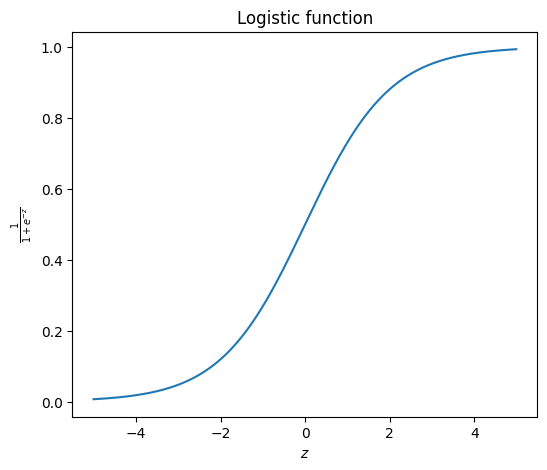

In [2]:
import numpy as np
import matplotlib.pylab as plt

z = np.arange(-5, 5, 0.01)
logistic = lambda x: (1 + np.exp(-x))**(-1)

fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(z, logistic(z))
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\frac{1}{1 + e^{-z}}$")
ax.set_title("Logistic function")
plt.show()

Um den Einfluss der Parameter des Modells zu betrachten, beschränken wir uns für die untere Zelle auf das logistische Regressionsmodell mit einer erklärenden Variablen.

$$
f_{\boldsymbol{ \beta }}(x) = \frac{1}{1 + e^{- \left(\beta_0 + \beta_1 x\right) }}
$$

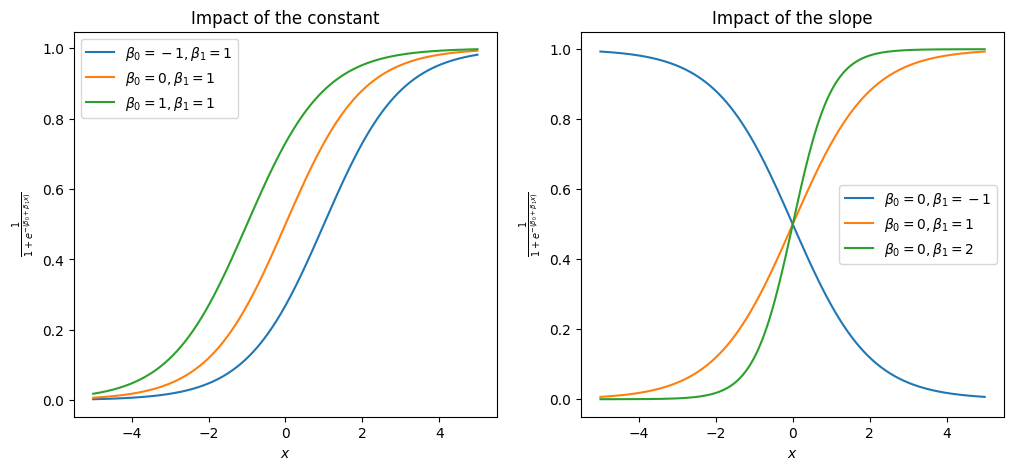

In [3]:
import numpy as np
import matplotlib.pylab as plt


beta_null = [-1, 0, 1]
beta_one = [-1, 1, 2]

x = np.arange(-5, 5, 0.01)
logistic = lambda x: (1 + np.exp(-x))**(-1)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(x, logistic(beta_null[0] + beta_one[1] * x), label = r"$\beta_0 = -1, \beta_1 = 1$")
axs[0].plot(x, logistic(beta_null[1] + beta_one[1] * x), label = r"$\beta_0 = 0, \beta_1 = 1$")
axs[0].plot(x, logistic(beta_null[2] + beta_one[1] * x), label = r"$\beta_0 = 1, \beta_1 = 1$")
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$\frac{1}{1 + e^{- \left(\beta_0 + \beta_1 x\right)}}$")
axs[0].set_title("Impact of the constant")
axs[0].legend()

axs[1].plot(x, logistic(beta_null[1] + beta_one[0] * x), label = r"$\beta_0 = 0, \beta_1 = -1$")
axs[1].plot(x, logistic(beta_null[1] + beta_one[1] * x), label = r"$\beta_0 = 0, \beta_1 = 1$")
axs[1].plot(x, logistic(beta_null[1] + beta_one[2] * x), label = r"$\beta_0 = 0, \beta_1 = 2$")
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$\frac{1}{1 + e^{- \left(\beta_0 + \beta_1 x\right)}}$")
axs[1].set_title("Impact of the slope")
axs[1].legend()
plt.show()


Wir können sehen, dass eine Erhöhung der Konstanten $\beta_0$ zu einer parallen Verschiebung der S-Kurve führt, während $\beta_1$ kontrolliert, wie steil und in welche Richtung die S-Kurve verläuft. Da es sich beim Output des Modells "nur" um Wahrscheinlichkeiten handelt, muss durch den Nutzer noch eine Regel festgelegt werden, bei welcher Wahrscheinlichkeitsprognose die jeweilige Kategorie zugeordnet wird. Dieser Grenzwert wird oft als cut-off bezeichnet und meist zunächst auf den Wert $c=0.5$ gesetzt. Für die tatsächliche Prognose gilt somit folgende Regel:

$$
\hat{y} = 
\begin{cases}
1 & \text{ if } f_{\boldsymbol{ \beta }}(\boldsymbol{x}) > c \\
0 & \text{ else}
\end{cases}
$$

## Trainieren des logistischen Regressionsmodells

Wie im Fall des linearen Regressionsmodells stellt sich bei gegebenen Daten die Frage, welche Parameter die Daten am besten erklären. Im Fall der binären Klassifikation bedeutet dies, dass wir ein Modell besonders dann als gut und geeignet erachten, wenn hohe Wahrscheinlichkeitsprognosen für die tatsächliche jeweilige Kategorie abgegben werden. Konkret heißt dies $f_{\boldsymbol{ \beta }}(\boldsymbol{x})$ nimmt im besten Fall hohe Werte für $y = 1$ und geringe Werte für $y = 0$ an. Analog zum linearen Regressionsmodell, kann dies über meherere Datenpunkte durch die Wahl einer geeigneten Lossfunktion gemessen werden. Ohne näher auf die Herleitung dieser Lossfunktion angehen, betrachten wir in der nächsten Zelle den Zusammenhang von Werten $p$ im Intervall $[0, 1]$ und der Funktion: $-\log(p)$ an. Wir können erkenn, dass diese Funktion genau die gewünschte Eigenschaft besitzt. Angenommen es handelt sich bei $p$ um die Wahrscheinlichkeitsprognose für die tatsächliche Kategorie $y=1$, so ist der Wert $-\log(p)$ umso kleiner, je höher die Prognose für diese Kategorie ist.

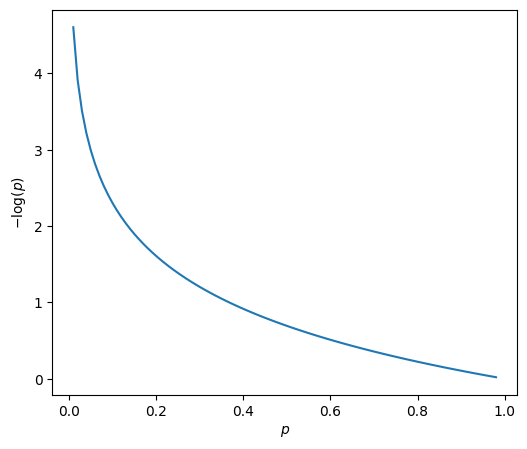

In [4]:
import numpy as np
import matplotlib.pylab as plt

p = np.arange(0.01, 0.99, 0.01)
fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(p, -np.log(p))
ax.set_xlabel(r"$p$")
ax.set_ylabel(r"$-\log(p)$")
plt.show()

Für mehrere Datenpunkte mit unterschiedlicher kategorialer Zugehörigkeit, müssen wir für die Berechnung der Lossfunktion immer beide Fälle in Betracht ziehen. Handelt es sich bei der Beobachtung um die Kategorie $y = 1$, so ist der Wert der Lossfunktion $-\log \left(f_{\boldsymbol{ \beta }}(\boldsymbol{x}) \right)$. Handelt es sich bei der Beobachtung um die Kategorie $y = 0$, so ist der Wert der Lossfunktion $-\log \left(1 - f_{\boldsymbol{ \beta }}(\boldsymbol{x}) \right)$. Mit Hilfe der Dummy-Kodierung von $y$, lässt sich dies je Beobachtung durch:

$$
-\log \left(f_{\boldsymbol{ \beta }}(\boldsymbol{x})\right)y - \log \left(1 - f_{\boldsymbol{ \beta }}\left(\boldsymbol{x}\right) \right)\left(1 - y\right)
$$

zusammenfassen. Da die Parameter anhand mehererer Datenpunkt geschätzt werden, ist die Lossfunktion durch den Durchschnitt dieser Werte definiert:

$$
L\left(\boldsymbol{y},  f_{\boldsymbol{ \beta }}(\boldsymbol{x})\right) = - \frac{1}{n} \sum_{i=1}^n \log \left(f_{\boldsymbol{ \beta }}(\boldsymbol{x})\right)y + \log \left(1 - f_{\boldsymbol{ \beta }}\left(\boldsymbol{x}\right) \right)\left(1 - y\right)
$$

Auch wenn die Darstellung dieser Lossfunktion formaler anspruchsvoller aussieht, als der Durchschnitt der quadratischen Abweichun des linearen Regressionsmodells, so bleibt das Prinzip analog das gleiche. Die Parameter werden so angepasst, dass sie die Modellprognosen möglichst ähnlich zu den tatsächlichen Beobachtungen verhalten. Im Fall der binären Klassifizierung bedeutet dies, dass hohe Wahrscheinlichkeitsprobnose für die tatsächliche Kategorie abgegeben werden. Gelingt dies, kann davon ausgegangen werden, ass das Modell durch die Wahl der Parameter erkannt hat, welche Variablen einen entsprechenden Einfluss auf die Kategorisierung haben. 

Notation: Auch wenn es zum jetzigen Zeitpunkt etwas unnötig erscheint, möchte ich an dieser Stelle eine vektor-orientierte Schreibweise der eben definierten Lossfunktion einführen. Hierzu definieren wir eine one-hot-kodierung der abhängigen Variable, die durch

$$
\tilde{\boldsymbol{y}} = 
\begin{cases}
\begin{pmatrix}
1 \\
0
\end{pmatrix} & \text{ if } y = 1 \\
\begin{pmatrix}
0 \\
1
\end{pmatrix} & \text{ if } y = 0 \\
\end{cases}
$$

gegeben ist. Zudem definieren wir den Vektor der Wahrscheinlichkeitsprognosen für beide Kategorien mit $\boldsymbol{\pi}_{\boldsymbol{\beta}}^T = \begin{pmatrix} f_{\boldsymbol{ \beta }}(\boldsymbol{x}) & 1 - f_{\boldsymbol{ \beta }}(\boldsymbol{x}) \end{pmatrix}$. Auf diese Weise kann die Lossfunktion auch durch:

$$
L\left(\boldsymbol{\tilde{Y}},  f_{\boldsymbol{ \beta }}(\boldsymbol{x})\right) = -\frac{1}{n} \sum_{i=1}^n \tilde{\boldsymbol{y}}_i \log \left( \boldsymbol{\pi}_{\boldsymbol{\beta}, i} \right)
$$

dargestellt werden. Diese etwas allgemeinere Darstellung kann dür den Fall einer abhängigen Variablen mit mehr als zwei Kategorien analog verwendet werden. Näheres folgt etwas später in diesem Kapitel.

Als einführendes Beispiel schätzen wir das logistische Regressionsmodell für den Datensatz der Kreditkartenausfälle. Im Output sehen wir die geschätzten Parameter des logistischen Regressionsmodells, wobei postive Einflüsse der Variablen balance und inconce und ein negativer Einfluss der Variablen student ersichtlich werden. Man sollte hier bei der Interpretation der Einflussstärke aufpassen, da die erklärenden Variablen nicht in vergleichbarer numerischer Reichweite sind. Während die Variable student Dummy-Kodierung aufweist, beläuft sich der Mittelwert der balance auf ungefähr 835 und der des income auf 33517. Um den Einflussstärke besser vergleichen zu können, schätzen wir das Modell mit standardisierten Formen der Variablen balance und income in der Zelle unterhalb erneut und können auf diese Art erkennen, dass die Variable balance den größten Einfluss auf den Zahlungsaufall hat. Dies bedeutet, je höher die Belastung der Kreditkarte, umso höher die Wahrscheinlichkeit eines Ausfalls. Zudem haben Studierende eine geringere Ausfallquote. Gemäß dem p-value der Variable income, kann nicht von einem statistisch signifikant von null verschiedenen Einfluss ausgegangen werden. Die Interpretation wäre jedoch analog zur Variablen balance.

In [5]:
import pandas as pd
import statsmodels.api as sm

default_df = pd.read_csv("../Daten/Default.csv", index_col="Unnamed: 0")
default_df = pd.get_dummies(default_df, dtype = "int")
default_df.drop(["default_No", "student_No"], axis = 1, inplace = True)
default_df.rename({"default_Yes": "default", "student_Yes": "student"}, axis = 1, inplace = True)
X = default_df.drop(["default"], axis = 1)
X = sm.add_constant(X)
y = default_df.default

logistic_regression = sm.Logit(y, X)
results = logistic_regression.fit()
print(results.summary())

y_hat = (results.predict(X) > 0.50) * 1

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Sep 2023   Pseudo R-squ.:                  0.4619
Time:                        20:00:22   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0

In [6]:
import pandas as pd
import statsmodels.api as sm

default_df = pd.read_csv("../Daten/Default.csv", index_col="Unnamed: 0")
default_df = pd.get_dummies(default_df, dtype = "int")
default_df.drop(["default_No", "student_No"], axis = 1, inplace = True)
default_df.rename({"default_Yes": "default", "student_Yes": "student"}, axis = 1, inplace = True)
default_df.loc[:, ["balance", "income"]] = (default_df.loc[:, ["balance", "income"]] - default_df.loc[:, ["balance", "income"]].mean()) / default_df.loc[:, ["balance", "income"]].std()
X = default_df.drop(["default"], axis = 1)
X = sm.add_constant(X)
y = default_df.default

logistic_regression = sm.Logit(y, X)
results = logistic_regression.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Sep 2023   Pseudo R-squ.:                  0.4619
Time:                        20:00:22   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9752      0.194    -30.849      0.000      -6.355      -5.596
balance        2.7748      0

## Evaluation der Güte des logistischen Regressionsmodells

Ziel des logistischen Regressionsmodells ist es, die Kategorien anhand der Informationen der unabhängigen Variablen möglichst gut vorherzusagen. Somit ist oft der erste Blick des Modells auf die Trefferquote (Accuracy) gerichtet, bei der die Frequenz korrekter Vorhersagen ermittelt wird. Definieren wir für eine einzelne Variable die Vorhersagegenauigkeit mit:

$$
acc = 
\begin{cases}
1 & \text{ if } y = \hat{y} \\
0 & \text{ else }
\end{cases}
$$

so ist die durchschnittliche Trefferquote mit:

$$
AC = \frac{1}{n} \sum_{i = 1}^n acc_i
$$

definiert. Bestimmen wir diese für den Default-Datensatz, sehen wir eine Trefferquote von $AC = 0.9732$ was auf den ersten Eindruck sehr gut erscheint. Wie beim linearen Regressionsmodell, sollte man jedoch auch hier das Modell immer mit einer sinnvollen Benchmark vergleichen. Bei Klassifikationen ist hierfür immer die Frequenz der Kategorie mit größerer Auftretenshäufigkeit ein guter Wert. 

In [7]:
from sklearn.metrics import accuracy_score

print(f"The accuracy rate for the default data set is equal to: {accuracy_score(y, y_hat)}")

The accuracy rate for the default data set is equal to: 0.9732


Bestimmen wir diese, sehen wir, dass die Frequenz des Ausfalls lediglich bei:

In [8]:
print(f"The frequency of default in the data set is: {y.mean():.4f}")

The frequency of default in the data set is: 0.0333


liegt. Dies bedeutet, dass wir eine Trefferquote von $1 - 0.0333 = 0.9667$ erreichen würden, wenn wir einfach für alle Beobachtungen keinen Ausfall vorhersagen würden. Die alleinige Betrachtung der Trefferquote des Modells kann somit irreführend sein. Dies gilt insbesondere für unausgeglichene (unbalanced) Daten, bei denen mindestens eine Kategorie mit deutlich höherer Frequenz auftritt als die übrigen Kategorien. Um ein etwas detailliertes Bild der Güte des logistischen Regressionsmodells zu erhalten, ist zunächst ein Blick auf die Konfusionsmatrix (confusion matrix) ratsam. In der Konfusionsmatrix werden für jede Kategorie die vorhergesagten Kategorien mit den tatsächlichen abgeglichen. In der unteren Zelle ist diese Matrix für den Default-Datensatz und das logistische Regressionsmodell abgebildet. Auf der x-Achse sind die vorhergesagten Kategorien des Modells abgetragen, auf dier y-Achse die der tatsächlichen Realisierungen. Somit sind auf der Diagonalen die Fälle mit korrekter Prognose. Hierbei kann man nun jedoch unterschieden. Als "positive" werden Vorhersagen und Realisierungen der Kategorie von Interesse bezeichnet. Es muss sich somit nicht um einen positiven Sachverhalt handeln, sondern in unserem Beispiel wäre eine positive Vorhersage, die Vorhersage, dass es zum Ausfall kommt und eine positive Realisierung wäre entsprechend ein tatsächlicher Ausfall. Die Anzahl der True Positives (TP) befinden sich somit im unteren rechten Eck der Matrix, in unserem Beispiel kommt es zu $104$ TP. Analog sind True Negatives (TN) korrekte Vorhersagen eines Nicht-Ausfalls. Die Anzahl dieser sind im linken oberen Eck der Matrix mit $9634$ gegeben. Nun kommen wir zu den beiden möglichen Fehlern des Modells. Einerseits kann es passieren, dass das Modell einen Ausfall vorhersagt und es zu keinem Ausfall kommt. Dies wird als False Positive (FP) bezeichnet und findet sich im oberen rechten Eck der Matrix ($33$ Fälle in unserem Beispiel). Der andere Fehler, der passieren kann ist, dass das Modell keinen Ausfall prognostiziert, es jedoch zu einem Ausfall kommt. Dies wird als False Negative (FN) bezeichnet und repräsentiert in unserem Beispiel die häufigere Fehlerquelle ($229$ Instanzen). Je nach Problemstellung ist diese Asymmetrie sehr wichtig. So kann es sein, dass es für medizinische Tests tolerierbarer ist, wenn Krankheiten zunächst fehlerhaft diagnostiziert werden an Stelle dem Übersehen von Krankheiten. Auch für eine Bank kann es wichtiger sein, tatsächliche Ausfälle zu prognostizieren, als einzelne Personen fälschlicherweise der Risikogruppe der Personen zuzuweisen, die den Kredit nicht (vollständig) zurück zu zahlen. Um diese Fehler besser differenzieren können, wird oft die Precision und der Recall des Modells mit angegeben. 

Bei der Precision handelt es sich um:

$$
\text{precision} = \frac{TP}{TP + FP}
$$

wobei diese Kennzahl die Fähigkeit des Modells angibt, möglichst wenig falsche positive Vorhersagen zu generieren. Der Recall ist durch:

$$
\text{recall} = \frac{TP}{TP + FN}
$$

definiert und beschreibt die Fähigkeit des Modells die positiven Kategorien der abhängigen Variable zu identifzieren. Da es sich bei beiden Kennzahlen um wichtige Informationsquellen zur Güte des Modells handelt, werden diese in der F1-Score zusammengefasst:

$$
F_1 = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$

Sowohl die Werte der Konfusionsmatrix, wie auch die eben beschriebenen Kennzahlen zeigen in unserem Beispiel, dass das Modell eher Probleme damit hat tatsächliche Ausfalle richtig zu prognostizieren, als zu viele falsche positive Prognosen abzugeben. Im allgemeinen gilt wieder, dass es nur dann Sinn macht, mögliche Einflüsse unabhängiger Variablen inhaltlich zu interpretieren, wenn das Modell in der Lage ist die Realität zufriedenstellend zu erklären. Die Frage, was als zufriedenstellen empfunden wird, kann jedoch nur unter Verwendung ökonmischer Ziele oder Expertenwissen festgelegt werden. Es sei angemerkt, dass es weitere Kennzahlen zur Beurteilung binärer Klassifizierungsprobleme gibt, auf deren Darstellung wir hier verzichten. Zudem eignen sich die hier vorgestellten Kennzahlen auch für andere binäre Klassifizierungsmodelle als der logistischen Regression.

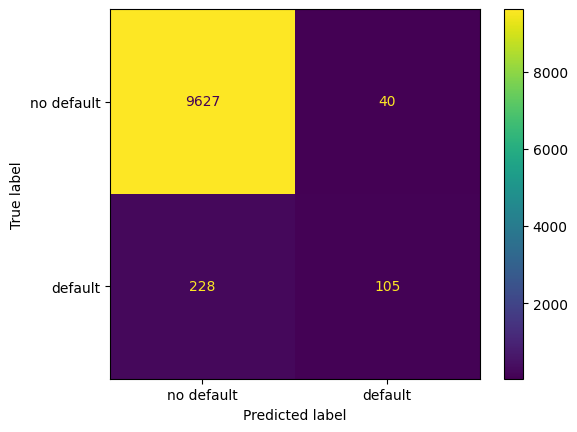

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score
import matplotlib.pylab as plt

cm = confusion_matrix(y, y_hat)
disp = ConfusionMatrixDisplay(cm, display_labels = ["no default", "default"])
disp.plot()
plt.show()

In [10]:
print(f"The precision of the model is: {precision_score(y, y_hat):.4f}")
print(f"The recall of the model is: {recall_score(y, y_hat):.4f}")
print(f"The f1 score of the model is: {f1_score(y, y_hat):.4f}")

The precision of the model is: 0.7241
The recall of the model is: 0.3153
The f1 score of the model is: 0.4393


## Beurteilung des Einlusses der unabhängigen Variablen

Durch die Verwendung der logistischen Funktion verändert sich die Interpretation des Einflusses der unabhängigen Variablen. Wir betrachten hierzu in der unteren Zelle den Spezialfall eines logistischen Regressiosmodells mit einer Variablen und den Parametern $\beta_0 = 0$ und $\beta_1 = 1$. Im Gegensatz zur linearen Regression ist der Einfluss der Variable $x$ auf die Wahrscheinlichkeitsprognose nicht-linear. Dies bedeutet, je nachdem welcher Wert für $x$ gerade aktuell eingenommen wird, führt eine Veränderung dieses Wertes um eine Einheit zu unterschiedlichen Veränderungen der Wahrcheinlichkeitsprognose. Erhöht sich $x$ beispielsweise von $0$ auf $1$, so verändert sich die Wahrscheinlichkeitsprognose von $0.50$ auf $0.73$. Erhöht sich $x$ jedoch zum Beispiel von $2$ auf $3$ verändert sich die Wahrscheinlichkeitsprognose lediglich von $0.88$ auf $0.95$. Dies bedeutet, dass der Effekt einer Erhöhung von $x$ abnimmt, wenn $x$ bereits einen relativ hohen Wert hat. 

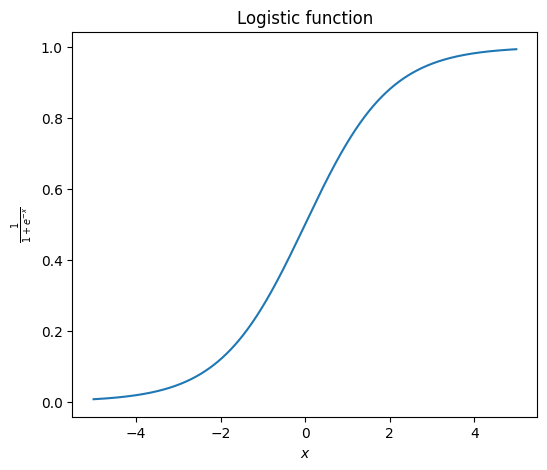

In [11]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5, 5, 0.01)
logistic = lambda x: (1 + np.exp(-x))**(-1)

fig, ax = plt.subplots(figsize = (6, 5))
ax.plot(x, logistic(z))
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\frac{1}{1 + e^{-x}}$")
ax.set_title("Logistic function")
plt.show()

Mathematisch lässt sich zeigen, dass:

$$
\log \left( \frac{P(y = 1| \boldsymbol{x})}{1 - P(y = 1| \boldsymbol{x})}  \right) = \boldsymbol{\beta}^T \boldsymbol{x}
$$

Also ist das logarithmierte Verhältnis der Wahrscheinlichkeitsprognosen für die jeweiligen Kategorien wieder linear. Ehrlicherweise muss ich jedoch gestehen, dass ich diese Art der Interpretation nicht als sonderlich erkenntnisreich empfinde, da ich es nicht gewohnt bin in logarithmierten Wahrscheinlichkeitsverhältnissen zu denken. Es bleibt mir somit lediglich der Hinweis, dass die Wirkungsrichtung der unabhängigen Variablen anhand der Vorzeichen identifiziert werden kann. Welchen lokalen Einfluss eine unabhängige Variablen hat, kann nur abhängig von ihrem aktuellen Wert quantifziert werden.

# Multinomiale und Softmax Regression

Hat man die Idee der logistischen Regresssion verstanden, ist es relativ leicht diese Idee auch für den Fall einer abhängigen Variable mit mehr als zwei Kategorien zu adaptieren. Zwei Modellierungen sind hierfür populär, das multinomiale Regressionsmodell und die Softmax-Regresssion. Beim multinomialen Modell werden für $K$ Kategorien $K-1$ Parametervektoren $\boldsymbol{\beta}_k$, bei der Softmax-Regression $K$ Parametervektoren $\boldsymbol{\beta}_k$ verwendet. Egal welches Modell verwendet wird, verstehen wir unter einem Parametervektor:

$$
\boldsymbol{\beta}_k = 
\begin{pmatrix}
\beta_{k0} \\
\beta_{k1} \\
\vdots \\
\beta_{kp} \\
\end{pmatrix}
$$

wenn $p$ unabhängige Variablen im Modell enthalten sind. Im Multinomialen Modell haben wir für die ersten $K-1$ Kategorien zunächst eine lineare Regressionsgerade:

$$
\beta_{10} + \beta_{11} x_1 + \beta_{12} x_2 + ... + \beta_{1p} x_p =  \boldsymbol{\beta}_1^T \boldsymbol{x} \\
\beta_{20} + \beta_{21} x_1 + \beta_{22} x_2 + ... + \beta_{2p} x_p =  \boldsymbol{\beta}_2^T \boldsymbol{x} \\
\vdots \\
\beta_{(K-1)0} + \beta_{(K-1)1} x_1 + \beta_{(K-1)2} x_2 + ... + \beta_{(K-1)p} x_p =  \boldsymbol{\beta}_{(K-1)}^T \boldsymbol{x} \\
$$

Wie beim logistischen Regressionsmodell hätten wir für diese Werte das Problem, dass der jeweilige Output je Regressionsgerade eine beliebige reelle Zahl ist, wir jedoch einzelne Kategorien vorhersagen möchten. Auch für diese Art von Modellierung werden an Stelle tatsächlicher Kategorien, Wahrscheinlichkeiten $P\left(y = k | \boldsymbol{x}\right)$ vorhergesagt. Um jedoch die reelle Zahlen in Wahrscheinlichkeiten zu übersetzen, bedarf es eines ähnlichen "Tricks" wie bei der Verwendung der logistischen Regression. Für ein Modell mit mehreren Kategorien muss für alle Wahrscheinlichkeitsprognosen gelten, dass sie im Wertebereich $[0, 1]$ sind. Zudem müssen sie sich zu $1$ aufsummieren, da es sich bei den Kategorien um disjunkte Ereignisse handelt. Um dies zu erreichen, werden die Werte der Regressionsgeraden beim multinomialen Modell durch:

$$
P\left(y = k | \boldsymbol{x}\right) = f_{\boldsymbol{\beta}_k} \left( \boldsymbol{x} \right) = \frac{e^{ \boldsymbol{\beta}_k^T \boldsymbol{x}}}{1 + \sum_{l=1}^{K-1} e^{ \boldsymbol{\beta}_l^T \boldsymbol{x}}}
$$

in Wahrscheinlichkeiten transformiert. Die Wahrscheinlichkeitsprognose der Kategorie $K$ (die übrigens beliebig gewählt werden kann), resultiert aus den $K-1$ Wahrscheinlichkeitsprognosen:

$$
P\left(y = K | \boldsymbol{x}\right) = 1 - \sum_{l=1}^{K-1} P\left(y = l | \boldsymbol{x}\right) = f_{\boldsymbol{\beta}_K} \left( \boldsymbol{x} \right) = \frac{1}{1 + \sum_{l=1}^{K-1} e^{ \boldsymbol{\beta}_l^T \boldsymbol{x}}}
$$

Bei der Softmax-Regression, werden für alle $K$ Kategorien Regressionsgeraden gebildet:

$$
\beta_{10} + \beta_{11} x_1 + \beta_{12} x_2 + ... + \beta_{1p} x_p =  \boldsymbol{\beta}_1^T \boldsymbol{x} \\
\beta_{20} + \beta_{21} x_1 + \beta_{22} x_2 + ... + \beta_{2p} x_p =  \boldsymbol{\beta}_2^T \boldsymbol{x} \\
\vdots \\
\beta_{K0} + \beta_{K1} x_1 + \beta_{K2} x_2 + ... + \beta_{Kp} x_p =  \boldsymbol{\beta}_{K}^T \boldsymbol{x} \\
$$

Jede reelle Zahl der jeweiligen Geraden wird mittels der Softmax-Funktion in Wahrscheinlichkeiten transformiert:

$$
P\left(y = k | \boldsymbol{x}\right) = f_{\boldsymbol{\beta}_k} \left( \boldsymbol{x} \right) = \frac{e^{ \boldsymbol{\beta}_k^T \boldsymbol{x}}}{\sum_{l=1}^{K} e^{ \boldsymbol{\beta}_l^T \boldsymbol{x}}}
$$

Für das Softmax-Modell müssen somit $p+1$ mehr Parameter geschätzt werden, dennoch ist dieser Ansatz im Machine Learning etwas populärer, hingegen wird die multinomiale Regression vermehrt in der statistischen Analyse eingesetzt. Auch wenn diese Modelle mehr Parameter und mehr Modellgleichungen als die logistische Regression verwenden, bleibt die Art der Modellierung der logistischen Regression ähnlich. Ausgangspunkt ist immer die lineare Regressionsgerade, welche je nach Bedarf der Modellierung unter Verwendung einer passenden Funktion transformiert wird. Auch die Modelle für $K>2$ Kategorien, können unter der gleichen Lossfunktion geschätzt werden. Sei $\tilde{\boldsymbol{y}}$ ein $K$ dimensionaler one-hot-Vektor, der an der Position $k$ den Wert $1$ und an allen übrigen Positionen den Wert $0$ hat. Zudem sei $ \boldsymbol{\pi}_{B} $ der Vektor der Wahrscheinlichkeitsprognosen, dann werden alle Parameter $B$ des Modells durch die Minimieren der Lossfunktion:

$$
L\left(\boldsymbol{y},  \boldsymbol{f}_{\boldsymbol{ B }}(\boldsymbol{x})\right) = -\frac{1}{n} \sum_{i=1}^n \tilde{y}_i \log \left( \boldsymbol{\pi}_{\boldsymbol{B}, i} \right)
$$

geschätzt. Wie bei der logistischen Regression, handelt es sich bei den Funktionen die zur Transformation in Wahrscheinlichkeiten eingesetzt werden um nicht-lineare Funktionen. Das bedeutet, dass die Vorzeichen der Parameter in Ihrer Wirkungsrichtung auf die jeweilige Kategorienwahrscheinlichkeit interpretiert werden können, jedoch hängt die Stärke des Einflusses auf die jeweilige Wahrscheinlichkeitsprognosen vom aktuellen Wert der unabhängigen Variable ab. Wenn es um die Beurteilung der Güte der Modelle geht, können die Kennzahlen aus der binären Klassifizierung zum Teil genauso (accuracy, confusion matrix) und zum Teil in adaptierter Form verwendet werden. Da in den Wirtschaftswissenschaften meist Regressionsprobleme und binäre Klassifizierungsprobleme verbreiteter sind, verzichten wir auf Beispiele und weitere Darstellungen zur Klassifizierung von mehr als zwei Kategorien. Zudem möchte ich noch darauf hinweisen, dass die hier besprochenen Modelle für nomiale Kategorien entwickelt worden sind. Handelt es sich um eine ordinal skalierte abhängige Variable, muss die Reihung der Variable mit berücksichtigt werden. Dies wird beispielsweise beim ordinalen Regressionsmodell gemacht.